# Project: What insights can we tell from GDP per capita? 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, datasets of indicators were investigated in order to gain insights about GDP per capita. All the datasets were obtained from [GAPMINDER.ORG](https://www.gapminder.org/data/), which are information about many indicators showing how people live their lives in different countries, tracked across the years.

In [1]:
# import modules for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> All the csv files are free downloadable from [GAPMINDER.ORG](https://www.gapminder.org/data/). The datasets of interst in this project are income per person (GDP per capita),life expectancy, population, urban population growth (annual percent) and working hours per week.

### General Properties

In [2]:
# read datasets that relevant to this investigation
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_life_exp = pd.read_csv('life_expectancy_years.csv')
df_pop = pd.read_csv('population_total.csv')
df_urban = pd.read_csv('urban_population_growth_annual_percent.csv')
df_working_hour = pd.read_csv('working_hours_per_week.csv')

In [3]:
# check first few rows of the dataset for example:
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


The dataframe of income (GDP per capita) stores values across the years in row direction. To combine many datasets of indicators, it is a good idea to reshape each dataset by making the years become values of a column 'year'. This can be done by using [pandas.DataFrame.melt()](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html). 

In [4]:
# reshape dataframes
df_income_edited=df_income.melt(id_vars=['country'],var_name='year',value_name='income')
df_income_edited.sort_values(['country','year'],inplace=True)

df_life_exp_edited =df_life_exp.melt(id_vars=['country'],var_name='year',value_name='life_expectancy')
df_life_exp_edited.sort_values(['country','year'],inplace=True)

df_pop_edited =df_pop.melt(id_vars=['country'],var_name='year',value_name='population')
df_pop_edited.sort_values(['country','year'],inplace=True)

df_urban_edited =df_urban.melt(id_vars=['country'],var_name='year',value_name='urban_pop_growth')
df_urban_edited.sort_values(['country','year'],inplace=True)

df_working_hour_edited =df_working_hour.melt(id_vars=['country'],var_name='year',value_name='working_hr')
df_working_hour_edited.sort_values(['country','year'],inplace=True)

Now all datasets are ready to be combined to one dataframe using [pandas.DataFrame.merge()](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

In [5]:
# combine all dataframes
df = df_income_edited.merge(df_life_exp_edited,on=['country','year'],how='outer')\
        .merge(df_pop_edited,on=['country','year'],how='outer')\
        .merge(df_urban_edited,on=['country','year'],how='outer')\
        .merge(df_working_hour_edited,on=['country','year'],how='outer')\

To investigate insights of information by regions, let's import geographic data of each countries. This dataset is downloadable at [GAPMINDER.ORG](https://www.gapminder.org/fw/four-regions/)

In [6]:
# Read geographic data of countries in datasets
df_continent = pd.read_csv('Data_Geographies.csv')

Then merge this dataframe to the one created previously.

In [7]:
# merge df with df_continent
df_edited = df.merge(df_continent, left_on ='country', right_on = 'name',how='left')

In [8]:
# Check if continents are assigned to all coutries
# This should return an empty array. Otherwise, return countries without continents assigned
df_edited[df_edited['name'].isnull()]['country'].unique()

array([], dtype=object)

Now let's see how the dataframe looks like

In [9]:
df_edited.head()

,country,year,income,life_expectancy,population,urban_pop_growth,working_hr,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,World bank income group 2017
0,Afghanistan,1800,603.0,28.2,3280000,NaN,NaN,afg,Afghanistan,asia,asia_west,south_asia,g77,33.0,66.0,19/11/1946,South Asia,Low income
1,Afghanistan,1801,603.0,28.2,3280000,NaN,NaN,afg,Afghanistan,asia,asia_west,south_asia,g77,33.0,66.0,19/11/1946,South Asia,Low income
2,Afghanistan,1802,603.0,28.2,3280000,NaN,NaN,afg,Afghanistan,asia,asia_west,south_asia,g77,33.0,66.0,19/11/1946,South Asia,Low income
3,Afghanistan,1803,603.0,28.2,3280000,NaN,NaN,afg,Afghanistan,asia,asia_west,south_asia,g77,33.0,66.0,19/11/1946,South Asia,Low income
4,Afghanistan,1804,603.0,28.2,3280000,NaN,NaN,afg,Afghanistan,asia,asia_west,south_asia,g77,33.0,66.0,19/11/1946,South Asia,Low income


### Data Cleaning

> Let's tidy up the data frame. Does it spark *JOY*?

First have a look at the information of the data frame

In [10]:
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 18 columns):
country                         58695 non-null object
year                            58695 non-null object
income                          46513 non-null float64
life_expectancy                 40437 non-null float64
population                      58695 non-null int64
urban_pop_growth                11180 non-null float64
working_hr                      1643 non-null float64
geo                             58695 non-null object
name                            58695 non-null object
four_regions                    58695 non-null object
eight_regions                   58695 non-null object
six_regions                     58695 non-null object
members_oecd_g77                58394 non-null object
Latitude                        58695 non-null float64
Longitude                       58695 non-null float64
UN member since                 58093 non-null object
World bank region      

It seems that values in 'year' are strings. These values should be converted to integer.

In [11]:
# Convert year to int
df_edited.year = df_edited.year.astype(int)

Some attributes don't spark *JOY*, let's remove them.

In [12]:
# drop column geo, name, latitude, longtitude, UN member since
df_edited.drop(['geo','name','members_oecd_g77','Latitude','Longitude','UN member since'],axis=1, inplace=True)

Also, changing some attributes'names would make life easier.

In [13]:
# change columns name
df_edited.rename({'World bank region':'wb_region',
                  'World bank income group 2017':'wb_income_group'},
                 axis=1,inplace=True)

I decided to keep NaN values as they are and not to remove the rows that contain missing data because some data in the rows is still important. Data wrangling may be done again when visualization. Let's see how dataframe looks like now.

In [14]:
df_edited.head()

,country,year,income,life_expectancy,population,urban_pop_growth,working_hr,four_regions,eight_regions,six_regions,wb_region,wb_income_group
0,Afghanistan,1800,603.0,28.2,3280000,NaN,NaN,asia,asia_west,south_asia,South Asia,Low income
1,Afghanistan,1801,603.0,28.2,3280000,NaN,NaN,asia,asia_west,south_asia,South Asia,Low income
2,Afghanistan,1802,603.0,28.2,3280000,NaN,NaN,asia,asia_west,south_asia,South Asia,Low income
3,Afghanistan,1803,603.0,28.2,3280000,NaN,NaN,asia,asia_west,south_asia,South Asia,Low income
4,Afghanistan,1804,603.0,28.2,3280000,NaN,NaN,asia,asia_west,south_asia,South Asia,Low income


<a id='eda'></a>
## Exploratory Data Analysis

> In this section, overall changes over years will be observed across four regions including America, Africa, Asia and Europe. Next, income (GDP per capita) and some indicators will be investigated to gain more insights about what can we tell from GDP.

### Are changes in economics, life expectancy and population over years different across regions?

To observe some changes across times, let's say the economic growth rate, using logarithm for GDP per capita can express the growth rate in much simpler way:

$${growth\:rate} = \frac{GDP(t_0+t)-GDP(t_0)}{GDP(t_0)} = \frac{GDP(t_0+t)}{GDP(t_0)}-1$$

$$log({growth\:rate}) = log(GDP(t_0+t))-log(GDP(t_0))$$

This way, the economic growth rate can be implied from the difference of two data points of interest. Changing rate for life expectancy and population growth can be done as well in a similar manner.

In [15]:
# Create new columns for log(GDP) and log(life_expectancy)
df_edited['log_income'] = np.log(df_edited.income)
df_edited['log_life_exp'] = np.log(df_edited.life_expectancy)
df_edited['log_population'] = np.log(df_edited.population)

Let's begin with the visualzation of income, life expectancy and population across the years comparing between four regions.

In [16]:
# groupby regions
df_groupby_regions = df_edited.groupby(['four_regions','year'],as_index=False).mean()

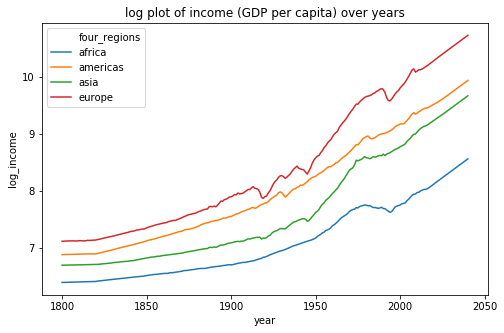

In [17]:
# plot log_income vs. year
plt.figure(figsize=(8,5));
order_regions = ['africa','americas','asia','europe']
sns.lineplot(x='year',y='log_income',data=df_groupby_regions,hue='four_regions',hue_order=order_regions);
plt.title('log plot of income (GDP per capita) over years');

From this plot, it shows that economics in Europe is the best following by Americas, Asia and Africa. However, high variance can be seen by the Europe's trend. We can also interpret from the plot that Europe and Asia have similar economic growth trend during 1950-2000. After 2000, economic in every regions averagely grow in the same rate.

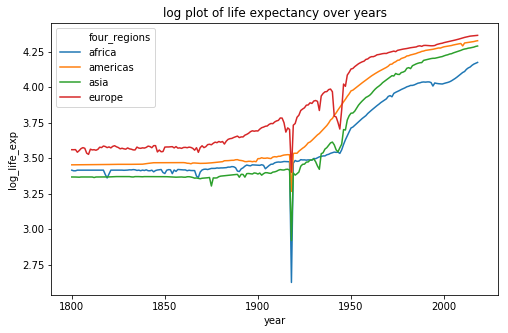

In [18]:
# plot log_life_exp vs. year
plt.figure(figsize=(8,5));
sns.lineplot(x='year',y='log_life_exp',data=df_groupby_regions,hue='four_regions',hue_order=order_regions);
plt.title('log plot of life expectancy over years');

What happened around 1900-1950? Which year exactly the life expectancy so low?

In [19]:
# find min
df_groupby_regions.query('life_expectancy == life_expectancy.min()').year

118    1918
Name: year, dtype: int64

In [20]:
# check the data in 1918
df_groupby_regions.query('year == 1918')

,four_regions,year,income,life_expectancy,population,urban_pop_growth,working_hr,log_income,log_life_exp,log_population
118,africa,1918,1055.203704,14.765000,2.669800e+06,NaN,NaN,6.815736,2.624402,13.981794
419,americas,1918,2783.142857,27.317576,5.782797e+06,NaN,NaN,7.761957,3.265821,13.562618
720,asia,1918,1540.122807,21.159623,1.791188e+07,NaN,NaN,7.155831,2.919446,13.657416
1021,europe,1918,3295.638298,31.902273,9.631556e+06,NaN,NaN,7.888320,3.400383,14.496780


It looks that life expectancy across the world is very low in 1918. This might be the result of "the 1918 influenza pandemic", which killed 3-5% of world population). 

ref.:[Wikipedia](https://en.wikipedia.org/wiki/Spanish_flu) 

One can further investigate which events affected life expectancy.

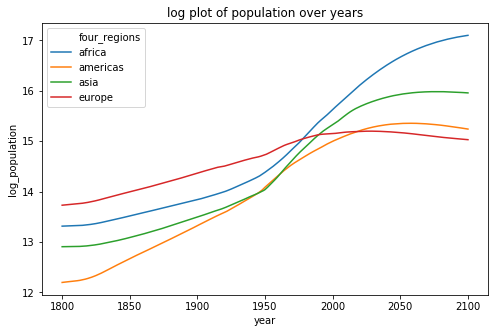

In [21]:
# plot log_population vs. year
plt.figure(figsize=(8,5));
sns.lineplot(x='year',y='log_population',data=df_groupby_regions,hue='four_regions',hue_order=order_regions);
plt.title('log plot of population over years');

The plot expresses that the population growth in every regions except Europe is S-shape curve. The trends also show that Europe is facing the highest depopulation rate. African population still seems to slowly increase.

### Does life expectancy correlate with income?

Let's see correlation of income and life expectancy in 2018.

In [22]:
# extract data of year 2018
df_2018 = df_edited.query('year == 2018')

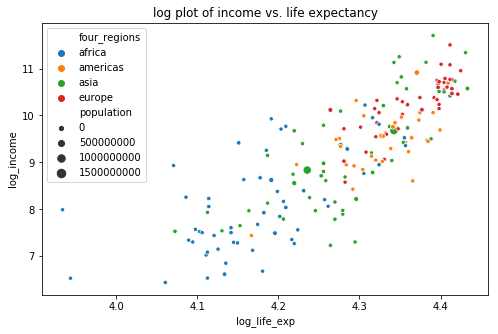

In [23]:
# visualization
plt.figure(figsize=(8,5));
sns.scatterplot(x='log_life_exp',y='log_income',data=df_2018,hue='four_regions',size='population',hue_order=order_regions);
plt.title('log plot of income vs. life expectancy');

It can be concluded from this plot that life expectancy and income have positive correlation. This can be further presumed that people who have high income can afford better medical treatment and healthy food.

### What is the relation of income and urbanization?

Here we will see how people tend to move in urban area in countries with different levels of income across regions. 

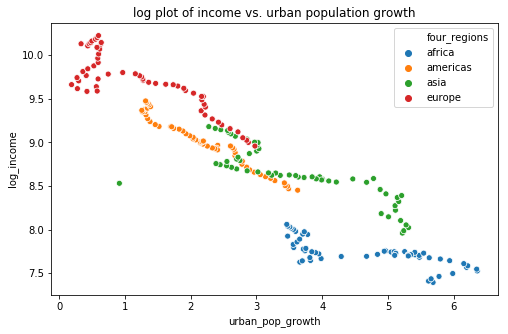

In [24]:
# plot log_income vs. urban_pop_growth
plt.figure(figsize=(8,5));
sns.scatterplot(x='urban_pop_growth',y='log_income',data=df_groupby_regions,hue='four_regions',hue_order=order_regions);
plt.title('log plot of income vs. urban population growth');

Do you see the same trends as I see? People tend to move into big cities in the lower income regions. This can be inferred that there is a large development gap between urbans and rurals. That is people may seek for a better life in the big cities. On the other hand, high income regions may have this smaller gap that people do not have to strive to live in urban areas.

### Does longer working hour reflect higher income?

I am from Asia, where most countries believe that hard workers earn more money and people tend to work long hours a day. Let's reveal this myth.

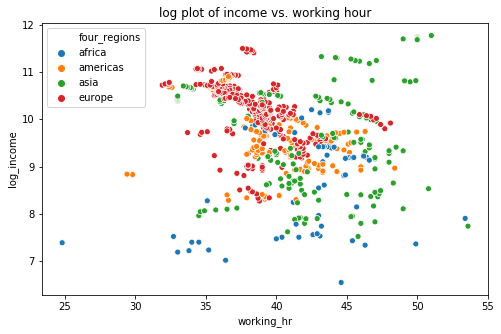

In [25]:
# plot log_income vs. working_hr using data from 2010
plt.figure(figsize=(8,5));
sns.scatterplot(x='working_hr',y='log_income',data=df_edited.query('year>=2010'),hue='four_regions',hue_order=order_regions);
plt.title('log plot of income vs. working hour');

This seems to be a myth, espcially for Asia and Africa. The correlation of income and working hour is vague, somehow even slightly negative correlation is found in case of Europe and Americas. This might depends also on types of work.

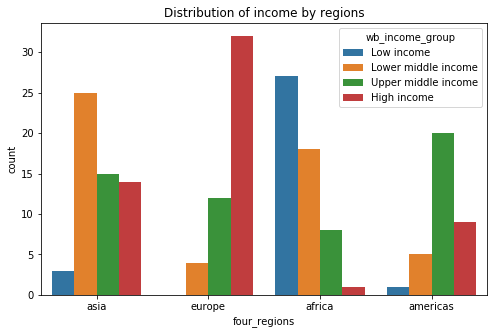

In [26]:
# Let's see how income distributes by regions by example of year 2018
plt.figure(figsize=(8,5))
order = ['Low income','Lower middle income','Upper middle income','High income']
sns.countplot(x='four_regions',hue='wb_income_group',data=df_2018,hue_order=order);
plt.title('Distribution of income by regions');

Obviously, distribution of income in Europe and Americas is left-skewed. One in Asia and Africa is another way around. This is more likely that people in high income countries work less hour. However, it is hard to conclude yet for middle and low income countries.

### Limitations

The challenge that I faced during this project is that there were many missing data points for some indicators. For example, data collection for working hour might be done in few years inconsistently and limited to some countries. The solution for this is probably creating new dataframe specificly for this indicator analysis and drop rows that contain missing data. Let's try this out to compare if it gives better result.

In [27]:
# create new dataframe containing only variables of interest
df_new = df_edited[['country','year','working_hr','log_income','four_regions','wb_income_group']]

In [28]:
# drop rows that contain missing value in columne 'working_hr'
df_new.dropna(subset=['working_hr'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58695 entries, 0 to 58694
Data columns (total 6 columns):
country            58695 non-null object
year               58695 non-null int64
working_hr         1643 non-null float64
log_income         46513 non-null float64
four_regions       58695 non-null object
wb_income_group    58394 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ MB


Now let's try repeating the analysis for working hour vs. income

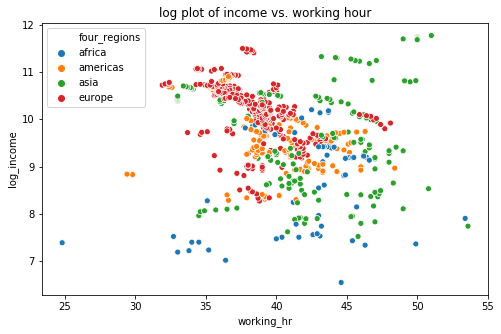

In [29]:
# plot log_income vs. working_hr using data from 2010
plt.figure(figsize=(8,5));
sns.scatterplot(x='working_hr',y='log_income',data=df_new.query('year>=2010'),hue='four_regions',hue_order=order_regions);
plt.title('log plot of income vs. working hour');

Umm.. this does not seem to change the result. So I would say that dropping Nan was not necessary in this case.

### Comments and Recommendations

These are just few examples about how can we tell some insights from GDP, but there are still a lot more data of indicators available for us to further investigate. For example in the analysis of GDP vs. life expectancy, I presumed that people who have high income can afford better services and facilities. One can prove if this hypothesis is true by taking into account some relevant datasets, such as, relative numbers of medical doctors, health expenditures paid by government intities, etc.

It is also interesting to see if it is true that there is always a large development gap between big cities and rural areas in low-income regions. More information within the region, such as, infrastuctures and services are necessary for further exploration.

Furthermore, in the last analysis about working hour not showing clear correlation with income, some other variables should be essential for this research question. For example, are some regions industry-based or agriculture-based?, what type of work dominate in the regions?

<a id='conclusions'></a>
## Conclusions


From this investigation, the change in economics over year across region could be seen, in which every regions show similar trends of economic growth while the highest income goes to Europe, following by Americas, Asia and Africa. The change in life expectancy increases over year, whereas some drops were observed. These drops in life expectancy can be influenced by many factors, such as, illness, wars, etc., which can be further explored. Population growth in exponential form, where Europe tends to depopulate the most. Depopulation is not yet the case for Africa.

Moreover, life expectancy is high in high income regions. Urban population growth is more significant in low income regions. More importantly, long working hour does not always result in high income. So let's work productively and spend time more efficiently :)

### References

-Gapminder: https://www.gapminder.org/data/

-Wikipedia: https://en.wikipedia.org/wiki/Spanish_flu